In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv("data/Little_Rock_Police_Department_Statistics_2017_to_Year_to_Date_updated.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80925 entries, 0 to 80924
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_DATE        80925 non-null  object 
 1   INCIDENT_NUMBER      80925 non-null  object 
 2   LOCATION_DISTRICT    80811 non-null  float64
 3   OFFENSE_CODE         80925 non-null  object 
 4   OFFENSE_DESCRIPTION  80925 non-null  object 
 5   WEAPON_TYPE          17902 non-null  object 
 6   INCIDENT_LOCATION    79873 non-null  object 
 7   CITY                 79873 non-null  object 
 8   STATE                79873 non-null  object 
 9   ZIP                  79869 non-null  float64
 10  LATITUDE             78783 non-null  float64
 11  LONGITUDE            78783 non-null  float64
 12  Location 1           78783 non-null  object 
 13  Incident Status      80913 non-null  object 
 14  TIME_OF_DAY          80925 non-null  int64  
 15  DAY_OF_WEEK          80925 non-null 

In [6]:
#drop Location 1 as it's redundant
df.drop("Location 1", axis=1, inplace=True)

In [7]:
#convert incident_date to datetime
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'])
df["WEEK_OF_MONTH"] = df["INCIDENT_DATE"].dt.day // 7
df["YEAR"] = df["INCIDENT_DATE"].dt.year
df["DAY"] = df["INCIDENT_DATE"].dt.day
df["DAY_OF_YEAR"] = df["INCIDENT_DATE"].dt.dayofyear
#Add weather data for temperature and precipitation for each day using the weather API


# Sort by date
df.sort_values(by="INCIDENT_DATE", inplace=True)
#Drop incident_date
# df.drop("INCIDENT_DATE", axis=1, inplace=True)

In [8]:
#Find if there are duplicate rows by INCIDENT_NUMBER
df["INCIDENT_NUMBER"].duplicated().sum()

5819

In [9]:
#Drop duplicate rows
df.drop_duplicates(subset="INCIDENT_NUMBER", inplace=True)

In [10]:
df.head().T

,48124,71652,72100,49684,73148
INCIDENT_DATE,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
INCIDENT_NUMBER,2017-029493,2018-078071,2017-030357,2017-003064,2017-000483
LOCATION_DISTRICT,40.0,80.0,72.0,64.0,72.0
OFFENSE_CODE,23G,11A,220,23D,23F
OFFENSE_DESCRIPTION,THEFT OF MOTOR VEHICLE PARTS,RAPE,BURGLARY/B&E,THEFT FROM BUILDING,THEFT FROM MOTOR VEHICLE
WEAPON_TYPE,NaN,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",NaN,NaN,NaN
INCIDENT_LOCATION,500 PRESIDENT CLINTON AVE,NaN,18020 CANTRELL RD,11410 W MARKHAM ST,16401 CHENAL VALLEY DR 1308
CITY,LITTLE ROCK,NaN,LITTLE ROCK,LITTLE ROCK,LITTLE ROCK
STATE,AR,NaN,AR,AR,AR
ZIP,72201.0,NaN,72223.0,72211.0,72223.0


In [11]:
#Find columns that contain strings
df.select_dtypes(include="object").columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'WEAPON_TYPE',
       'INCIDENT_LOCATION', 'CITY', 'STATE', 'Incident Status'],
      dtype='object')

In [12]:
#Drop INCIDENT_LOCATION as it's not categorical
df.drop("INCIDENT_LOCATION", axis=1, inplace=True)

In [13]:
#Turn all string columns into categorical
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category").cat.as_ordered()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75106 entries, 48124 to 78875
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   INCIDENT_DATE        75106 non-null  datetime64[ns]
 1   INCIDENT_NUMBER      75106 non-null  category      
 2   LOCATION_DISTRICT    75002 non-null  float64       
 3   OFFENSE_CODE         75106 non-null  category      
 4   OFFENSE_DESCRIPTION  75106 non-null  category      
 5   WEAPON_TYPE          12576 non-null  category      
 6   CITY                 74150 non-null  category      
 7   STATE                74150 non-null  category      
 8   ZIP                  74146 non-null  float64       
 9   LATITUDE             73096 non-null  float64       
 10  LONGITUDE            73096 non-null  float64       
 11  Incident Status      75095 non-null  category      
 12  TIME_OF_DAY          75106 non-null  int64         
 13  DAY_OF_WEEK          75106 

In [14]:
#Find numeric missing values
df.select_dtypes(include="number").isna().sum()

LOCATION_DISTRICT     104
ZIP                   960
LATITUDE             2010
LONGITUDE            2010
TIME_OF_DAY             0
DAY_OF_WEEK             0
TYPE_OF_DAY             0
SEASON                  0
MONTH                   0
WEEK_OF_MONTH           0
YEAR                    0
DAY                     0
DAY_OF_YEAR             0
dtype: int64

In [15]:
#Drop rows with missing ZIP
df.dropna(subset=["ZIP"], inplace=True)
#Find numeric missing values
df.select_dtypes(include="number").isna().sum()

LOCATION_DISTRICT     102
ZIP                     0
LATITUDE             1050
LONGITUDE            1050
TIME_OF_DAY             0
DAY_OF_WEEK             0
TYPE_OF_DAY             0
SEASON                  0
MONTH                   0
WEEK_OF_MONTH           0
YEAR                    0
DAY                     0
DAY_OF_YEAR             0
dtype: int64

In [16]:
#Turn categorical columns into numeric and fill missing values by code + 1, add boolean column for missing values
for label, content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        df[label] = pd.Categorical(content).codes + 1
        df[label + "_MISSING"] = pd.isnull(content)

df.head(20).T

,48124,72100,49684,73148,48662,14689,5943,70655,6193,62907,27688,5786,75419,4340,26052,66107,14636,44704,72639,44801
INCIDENT_DATE,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:01:00,2017-01-01 00:01:00,2017-01-01 00:34:00,2017-01-01 01:00:00,2017-01-01 01:20:00,2017-01-01 01:25:00,2017-01-01 01:55:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 02:53:00,2017-01-01 04:13:00
INCIDENT_NUMBER,3086,3168,279,25,1177,26,15,1528,2094,25266,8141,8,63,1,2,3,11,6,67,4
LOCATION_DISTRICT,40.0,72.0,64.0,72.0,64.0,80.0,82.0,72.0,82.0,63.0,61.0,90.0,72.0,90.0,54.0,40.0,91.0,52.0,70.0,54.0
OFFENSE_CODE,12,5,9,11,13,14,12,13,13,9,13,11,11,4,4,3,11,5,5,14
OFFENSE_DESCRIPTION,14,3,11,13,2,4,14,2,2,11,2,13,13,1,1,9,13,3,3,4
WEAPON_TYPE,0,0,0,0,0,0,0,0,0,0,0,0,0,13,7,13,0,0,0,0
CITY,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
STATE,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ZIP,72201.0,72223.0,72211.0,72223.0,72211.0,72204.0,72209.0,72223.0,72209.0,72205.0,72204.0,72210.0,72223.0,72209.0,72204.0,72202.0,72209.0,72206.0,72223.0,72204.0
LATITUDE,34.747444,34.808838,34.753991,34.773179,34.751107,34.669321,34.661484,34.811631,34.662399,34.761452,34.737204,34.698964,34.809421,34.676251,34.730494,34.745969,34.670025,34.730751,34.801964,34.73324


<AxesSubplot:xlabel='MONTH,WEEK_OF_MONTH'>

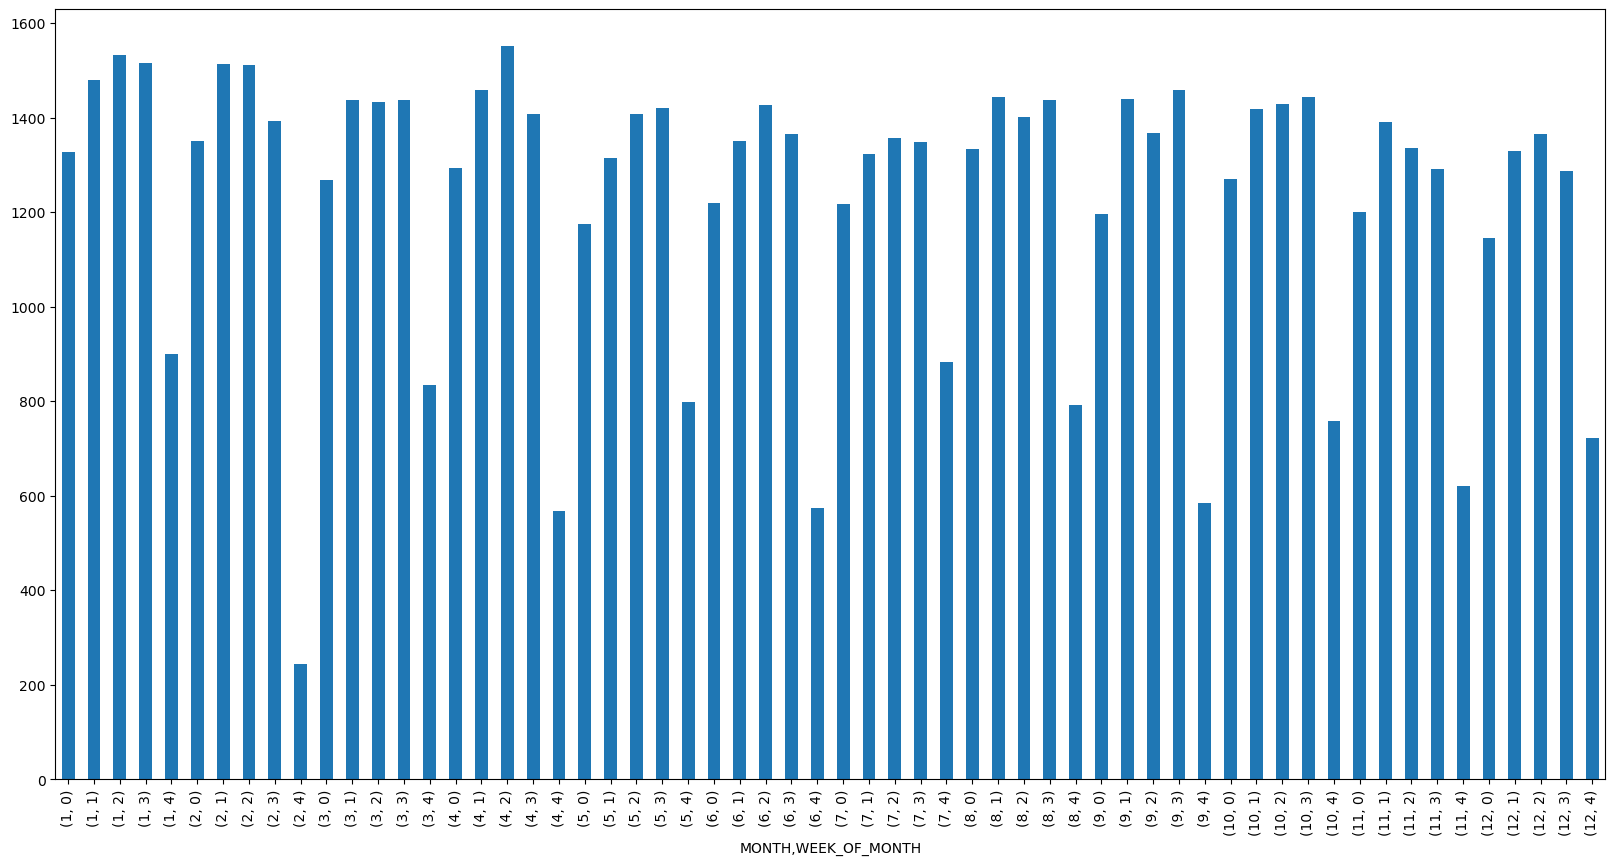

In [17]:
#Group by matching week of month for each month.
crimesPerMonth = df.groupby(["MONTH", "WEEK_OF_MONTH"]).count()["INCIDENT_NUMBER"]
crimesPerMonth.plot(kind="bar", figsize=(20, 10))

<AxesSubplot:xlabel='YEAR,DAY_OF_YEAR'>

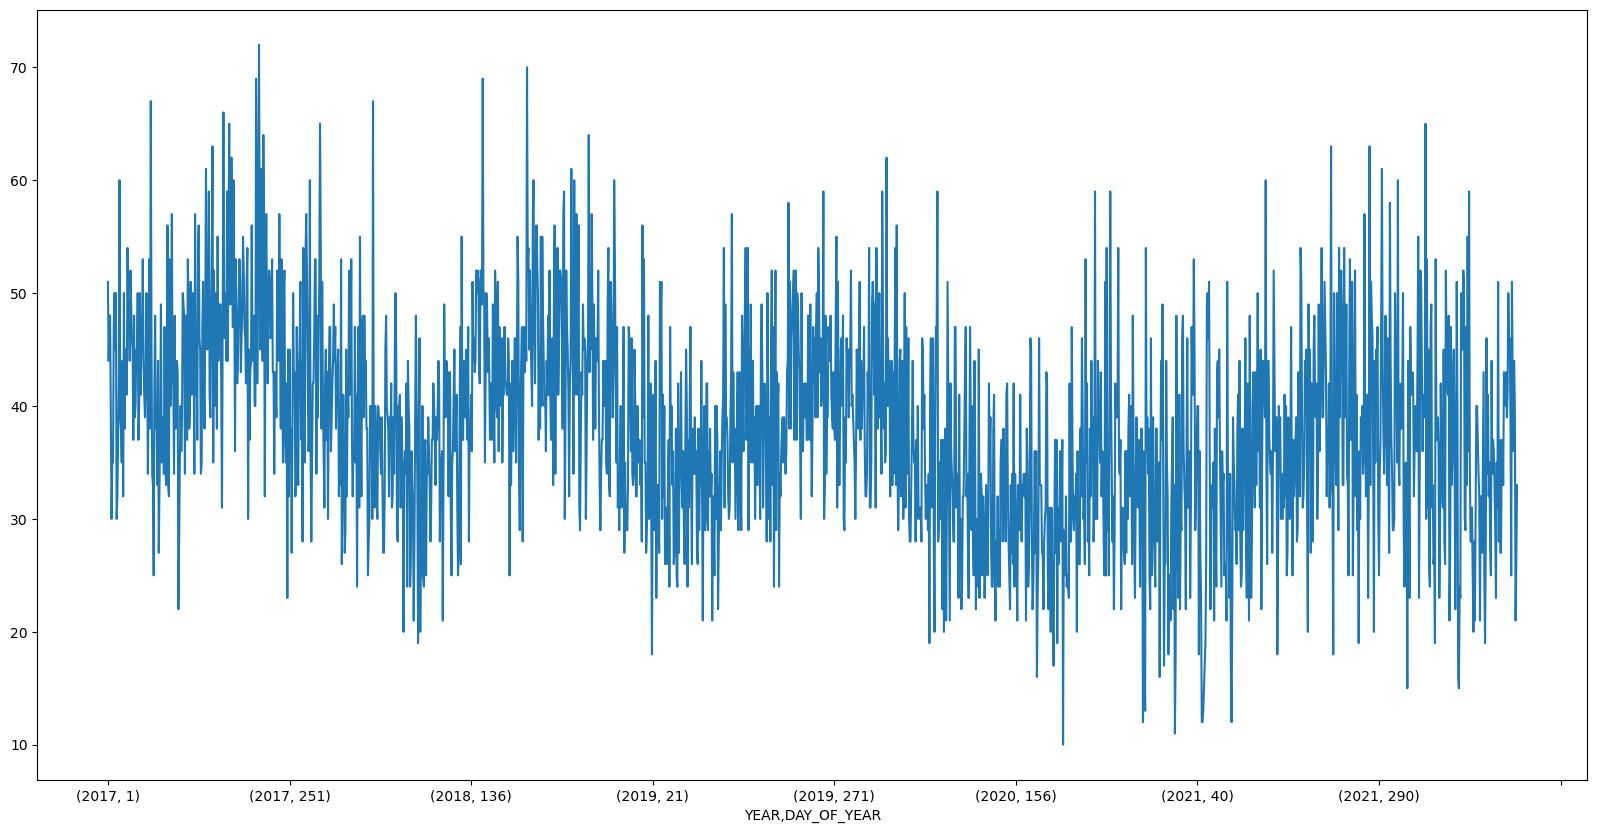

In [18]:
#Daily count of crimes per year.
crimesPerDay = df.groupby(["YEAR", "DAY_OF_YEAR"]).count()["INCIDENT_NUMBER"]
crimesPerDay.plot(kind="line", figsize=(20, 10))

In [19]:
#Import necessary libraries and create heatmap from actual map of Little Rock using LATITUDE and LONGITUDE.
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [29]:
#Create heatmap of crimes in Little Rock
from collections import defaultdict, OrderedDict
data = defaultdict(list)
df.dropna(subset=["LATITUDE", "LONGITUDE"], inplace=True)
for r in df.itertuples():
    data[r.YEAR].append([r.LATITUDE, r.LONGITUDE])

data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

m = folium.Map(location=[34.7466, -92.2896], zoom_start=12, tiles="stamentoner")

hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()),
                     radius=10,
                     auto_play=True,
                     max_opacity=0.3)
hm.add_to(m)
m